# Core

> Core functions

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
%matplotlib inline

In [ ]:
#| hide
from IPython.display import clear_output, DisplayHandle

def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [ ]:
#| export
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

### Dataloaders

Get the ground truth images located in a folder called 'gt' and divided in labeled subfolders 

In [ ]:
#| export
def get_gt(path, gt_file_name="avg50.png"): 
    def _fn(fn): return Path(path/"gt")/f"{parent_label(fn)}"/gt_file_name
    return _fn

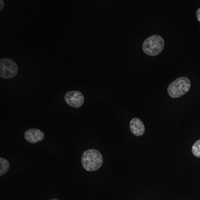

In [ ]:
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
fnames = get_image_files(path_train_raw)

my_get_gt = get_gt(path)
Image.open(my_get_gt(fnames[0])).to_thumb(200)

# from fastai.vision.widgets import *
# VBox([widgets.HTML('image'),
#       widget(im, max_width="192px")])

Get as ground truth another noisy image randomly chosen in the same folder as the input image

In [ ]:
#| export
from random import randint

def get_noisy_pair(fn):
    tmp = get_image_files(fn.parent, recurse=False)
    fn2 = tmp[randint(0,len(tmp)-1)]
    while fn2 == fn: fn2 = tmp[randint(0,len(tmp)-1)]
    return fn2

In [ ]:
fnames1 = fnames[0]
print(fnames1)
fnames2 = get_noisy_pair(fnames1)
print(fnames2)

../_data/Confocal_BPAE_B/raw/9/HV110_P0500510018.png
../_data/Confocal_BPAE_B/raw/9/HV110_P0500510001.png


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()